<hr>
Este material ha sido construido en conjunto con material suministrado por los profesores Pedro Atencio (Instituto Tecnol√≥gico Metropolitano), Carlos Mera (Universidad de Medellin), Albeiro Espinosa y Diego Pati√±o (Universidad Nacional de Colombia, Sede Medell√≠n); a ellos les damos cr√©dito.
<hr>

#  <center> VISI√ìN ARTIFICIAL </center>
## Agenda del d√≠a


### Unidad 4 - Funciones de transformaci√≥n b√°sica

### 4. Funciones de transformaci√≥n b√°sica
<ul>
<li>Operaciones binarias</li>
<li>Transformaciones geom√©tricas</li>
</ul>

# 4. Transformaciones u operaciones aritm√©ticas binarias (con dos im√°genes)

Las operaciones aritm√©ticas entre im√°genes son operaciones se llevan a cabo entre pares de pixeles correspondientes. Las cuatro operaciones b√°sicas son:

C(x, y) = A(x,y) + B(x,y)

C(x, y) = A (x,y) - B(x,y)

C(x, y) = A (x,y) * B(x,y)

C(x, y) = A (x,y) / B(x,y)


## Suma 

Podemos realizar una suma simple de dos im√°genes (sin que una de ellas tenga que ser una m√°scara), aunque resultando en saturaci√≥n...

In [56]:
#Importar las librerias necesarias y no olvidar el matplotlib inline para plotear las imagenes
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Leer las im√°genes, hacerlas del mismo tama√±o para poderlas sumar
img1 = cv2.cvtColor(cv2.imread('res/m3/example_4.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/m3/example_3.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

#Operaci√≥n suma de las dos im√°genes
res = cv2.add(img1,img2)

#Crear una figura 1x3 para plotear las im√°genes de entrada y la obtenida al sumarlas
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Suma");


La operaci√≥n suma tiene m√°s sentido como una combinaci√≥n ponderada de dos im√°genes...

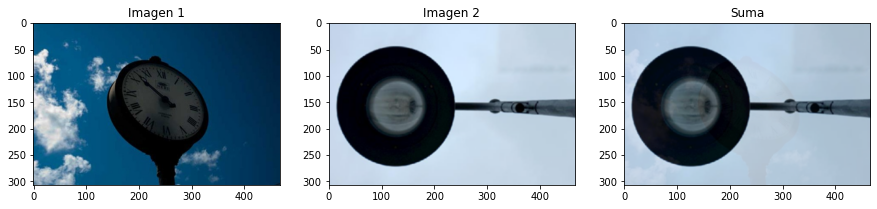

In [59]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Leer las im√°genes, hacerlas del mismo tama√±o para poderlas sumar
img1 = cv2.cvtColor(cv2.imread('res/m3/example_2.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/m3/example_3.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

#Indicamos el par√°metro a que indica la importancia de cada imagen
a = 0.1

#Mediante la T.Lineal, si a=1, tenemos la imagen 1 √∫nicamente. Si a=0, obtenemos solo img2.
# Si 0<a<1 tendremos combinaciones ponderadas de las im√°genes entrada
res = cv2.add(img1*a,img2*(1-a)).astype(np.uint8)

#Crear una figura 1x3 para mostrar las im√°genes de entrada y la combinaci√≥n ponderada
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Suma");


## Aplicaciones de la suma

El operador suma puede ser utilizado para sobreponerle a un objeto los bordes obtenidos por alg√∫n m√©todo de detecci√≥n de bordes.



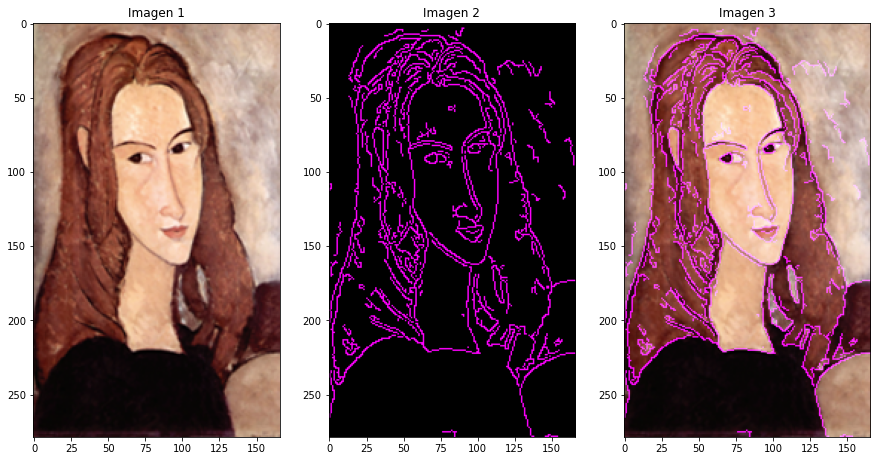

In [6]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Leer la imagen de entrada
img1 =cv2.cvtColor(cv2.imread('res/aritm/portrait.png'), cv2.COLOR_BGR2RGB)

#Utilizamos la funci√≥n cv2.Canny, que corresponde a un algoritmo de detecci√≥n de bordes
edges = cv2.Canny(img1,100,200)
#Resaltar los bordes de blanco si sus pixeles son menores que un valor umbral
edges[edges<128] = 0   
#Convertir la imagen edges a RGB
edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

edges[:,:,1]=0               #para obtener el color magenta (255,0,255)

#Crear una figura 1x3 para mostrar la imagen de entrada, la imagen obtenida con edges y la superposici√≥n
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(edges,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(cv2.add(img1,edges),cmap='gray')
plt.title("Imagen 3");



Tambi√©n podemos utilizar la suma para promediar im√°genes del mismo fen√≥meno que tengan ruido aleatorio y mejorar la calidad...

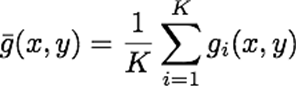

<img src="res/aritm/promedio.png">

Ejemplo interactivo: https://www.olympus-lifescience.com/en/microscope-resource/primer/java/digitalimaging/processing/imageaveraging/

C:\Users\esteb\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\esteb\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


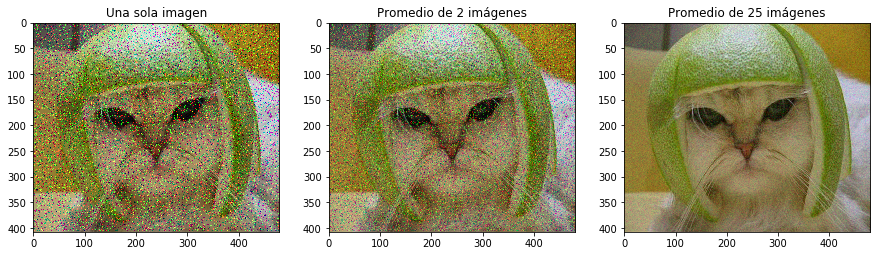

In [4]:
import numpy as np
import os
import cv2

#Definir la funci√≥n ruido, cuyo par√°metro es una imagen de entrada
def noisy(image):
    #Obtener los vectores fila, columna y el canal
    row,col,ch = image.shape
    #Dar valor a los par√°metros 
    s_vs_p = 0.5
    amount = 0.1
    #Generar una copia de la imagen de entrada
    out = np.copy(image)
  
    # Salt mode

    #Multiplica los par√°metros con el tama√±o de la imagen, los redondea al m√≠nimo entero
    num_salt = np.ceil(amount * image.size * s_vs_p)
    #Genera el vector coordenadas en la imagen de copia usando la funci√≥n randint de numpy
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
    #La imagen evaluada en el vector coords se satura
    out[coords] = 255
    
    # Pepper mode
    
    #Se multiplican los par√°metros por el tama√±o de la imagen, variando s_vs_p
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    #Generar el vector coords utilizando randint
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    #La imagen en el vector coords se satura en color negro
    out[coords] = 0
    return out

#Leer la imagen
img = cv2.cvtColor(cv2.imread('res/aritm/cat.jpg'), cv2.COLOR_BGR2RGB)


#Generar una lista, para guardar el promedio de 25 im√°genes
noisy_images = []
for i in range(25):
    #A√±adir a la lista las im√°genes promediadas ruidosas
    noisy_images.append(noisy(img))


#Crear una matriz de ceros del mismo tama√±o que img entrada    
averaged_2 = np.zeros(img.shape, np.float32)
#Se promedian las primeras dos im√°genes ruidosas
for i in range(2):
    averaged_2 += noisy_images[i]
averaged_2 = (averaged_2/2).astype(np.uint8)
    

#Crear una matriz de ceros del mismo tama√±o de img entrada    
averaged_25 = np.zeros(img.shape, np.float32)

#Se promedian las primeras 25 im√°genes ruidosas guardadas en la lista noisy_images
for i in range(25):
    averaged_25 += noisy_images[i]
averaged_25 = (averaged_25/25).astype(np.uint8)

#Crear una figura 1x3 y mostrar los promedios de una, dos y 25 im√°genes
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(noisy_images[0],cmap='gray')
plt.title("Una sola imagen")

plt.subplot(1,3,2)
plt.imshow(averaged_2,cmap='gray')
plt.title("Promedio de 2 im√°genes")

plt.subplot(1,3,3)
plt.imshow(averaged_25,cmap='gray')
plt.title("Promedio de 25 im√°genes");


## Resta

Podemos utilizar la operaci√≥n de resta sin necesidad de ponderar...

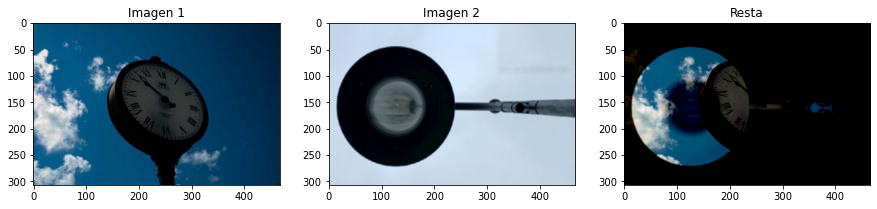

In [8]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Leer las im√°genes de entrada y asegurarse que tengan el mismo tama√±o
img1 = cv2.cvtColor(cv2.imread('res/m3/example_2.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/m3/example_3.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

#Realizar la operaci√≥n resta y darle el tipo de dato uint8
res = cv2.subtract(img1,img2).astype(np.uint8)

#Generar una figura 1x3 y mostrar im√°genes de entrada y la resta de las mismas
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Resta");
   

## Aplicaciones de la resta

La resta de im√°genes tiene uno de sus mayores usos en la segmentaci√≥n para eliminar (o corregir) el background de una escena. Para estos casos es conveniente a√±adir una compensaci√≥n a modo de evitar que nuestros valores se acerquen demasiado a 0 y perdamos informaci√≥n.


Text(0.5, 1.0, 'Resta')

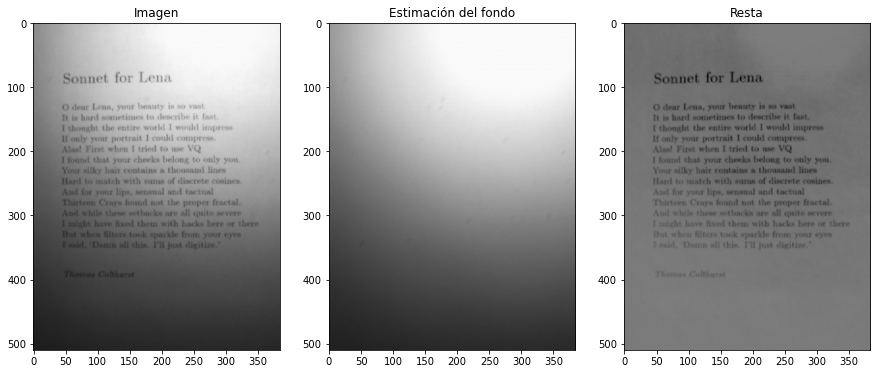

In [65]:

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de im√°genes de entrada
img1 = cv2.cvtColor(cv2.imread('res/aritm/son1.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/aritm/son2.jpg'), cv2.COLOR_BGR2RGB)

#Conversi√≥n de im√°genes al mismo tipo de dato, uint16
img1 = img1.astype(np.uint16)
img2 = img2.astype(np.uint16)

#Sumarle a cada posici√≥n de img1 125, como ahora es tipo uint16, no hay p√©rdida de informaci√≥n
img1 += 125

#Realiza la resta
res = img1 - img2

#Resta las 125 unidades de img1 que inicialmente sumamos
img1 -= 125

#Regresa al tipo de dato uint8, entre 0 y 255
img1 = img1.astype(np.uint8)
img2 = img2.astype(np.uint8)

#La resta debe por tanto, ser tambi√©n tipo de dato uint8
res=res.astype(np.uint8)

#Genera una figura 1x3 para realizar la muestra de im√°genes, fondo y resta.
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Estimaci√≥n del fondo")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Resta")

Otra aplicaci√≥n de la resta es en la detecci√≥n de movimiento entre dos im√°genes, √∫til en la compresi√≥n de video y en el seguimiento de objetos.

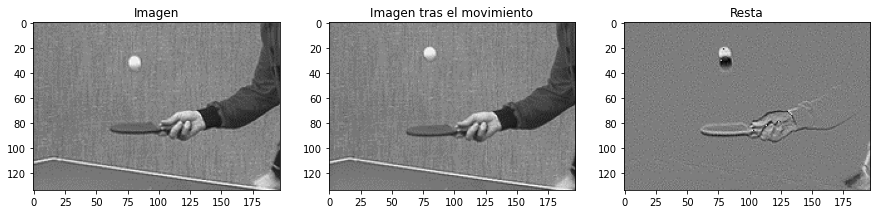

In [66]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de las dos im√°genes
img1 = cv2.cvtColor(cv2.imread('res/aritm/raqueta1.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/aritm/raqueta2.png'), cv2.COLOR_BGR2RGB)

#Conversi√≥n a tipo de dato uint16
img1 = img1.astype(np.uint16)
img2 = img2.astype(np.uint16)

#Suma 125 unidades a img1, hace la resta de im√°genes y los extraemos de nuevo
img2 += 125
res = img2 - img1
img2 -= 125

#Regresa al tipo de dato uint8 entre 0 y 255
img1 = img1.astype(np.uint8)
img2 = img2.astype(np.uint8)
res=res.astype(np.uint8)

#Genera una figura 1x3 para mostrar la imagen, una estimacion de fondo y la resta
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen tras el movimiento")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Resta");

La resta de im√°genes tambi√©n se usa mucho en medicina...

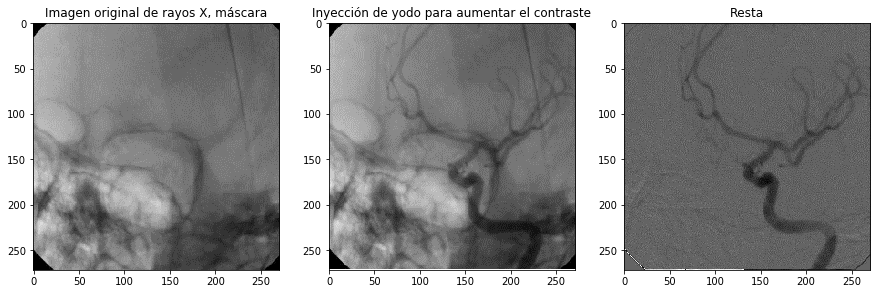

In [8]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de las im√°genes entrada
img2 = cv2.cvtColor(cv2.imread('res/aritm/venas1.png'), cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(cv2.imread('res/aritm/venas2.png'), cv2.COLOR_BGR2RGB)

#Conversi√≥n a uint16
img1 = img1.astype(np.uint16)
img2 = img2.astype(np.uint16)

#Suma 100 unidades a img1, hace la resta y extrae la misma cantidad de unidades
img1 += 100
res = img1 - img2
img1 -= 100

#Volver a uint8
img1 = img1.astype(np.uint8)
img2 = img2.astype(np.uint8)
res=res.astype(np.uint8)

#Generar figura 1x3 para mostrar la m√°scara, la inyecci√≥n de yodo y la resta de im√°genes
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img2,cmap='gray')
plt.title("Imagen original de rayos X, m√°scara")

plt.subplot(1,3,2)
plt.imshow(img1,cmap='gray')
plt.title("Inyecci√≥n de yodo para aumentar el contraste")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Resta");

La suma y la resta pueden combinarse para llevar a cabo seguimiento de objetos como se ve a continuaci√≥n:

<img src="res/aritm/movement.png">


## Multiplicaci√≥n

La multiplicaci√≥n de im√°genes puede ser usada para extraer regiones de inter√©s usando una mascara (aunque esto se hace con operaciones booleanas).


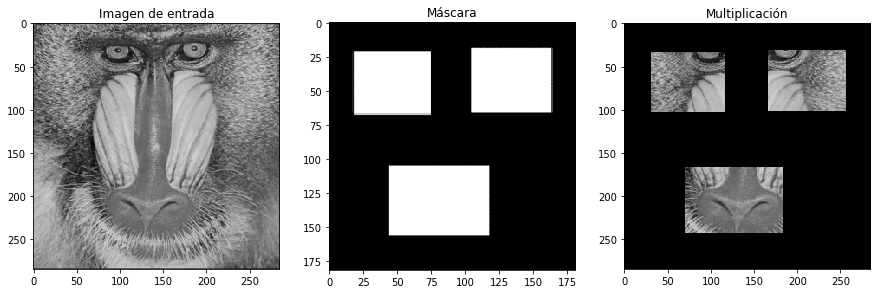

In [15]:
#Leer la imagen
img = cv2.cvtColor(cv2.imread('res/aritm/face.jpg'), cv2.COLOR_BGR2RGB)

#Leer la m√°scara y normalizarla, cambiar su tipo de dato y ajustar su tama√±o
mascara = cv2.imread('res/aritm/mask.png')/255
show_mask = cv2.imread('res/aritm/mask.png')/255
mascara = cv2.resize(mascara, (img.shape[1], img.shape[0])).astype(np.uint8)

#Operaci√≥n multiplicar
out = cv2.multiply(img, mascara)

#Figura 1x3 para mostrar imagen de entrada, m√°scara y la multiplicaci√≥n
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('M√°scara')
ax3.set_title('Multiplicaci√≥n')
ax1.imshow(img, cmap='gray')
ax2.imshow(show_mask, cmap='gray')
ax3.imshow(out, cmap='gray')

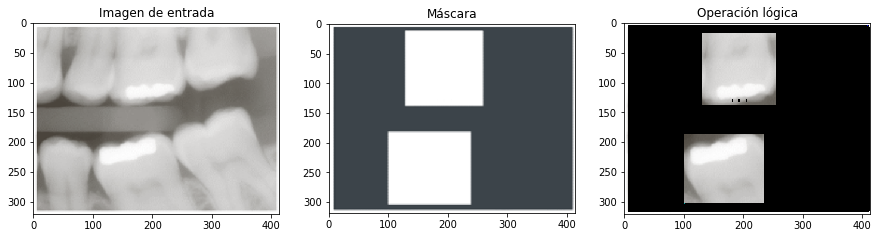

In [17]:
#Lectura de imagen
img = cv2.cvtColor(cv2.imread('res/aritm/dientes.png'), cv2.COLOR_BGR2RGB)

#Leer la m√°scara, normalizarla
mascara = cv2.imread('res/aritm/mask2.png')/255
show_mask = cv2.imread('res/aritm/mask2.png')
mascara = cv2.resize(mascara, (img.shape[1], img.shape[0]))
mascara = mascara.astype(np.uint8)

#Operaci√≥n multiplicaci√≥n
out = cv2.multiply(img, mascara)

#Figura 1x3 que muestra la imagen de entrada, m√°scara y la multiplicaci√≥n
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('M√°scara')
ax3.set_title('Operaci√≥n l√≥gica')
ax1.imshow(img, cmap='gray')
ax2.imshow(show_mask, cmap='gray')
ax3.imshow(out, cmap='gray')

## Divisi√≥n

La divisi√≥n puede ser utilizada para detectar movimiento de manera similar a la resta. Hay que considerar, sin embargo, que ser√° necesario escalar la imagen para poder visualizarla.

Text(0.5, 1.0, 'Divisi√≥n')

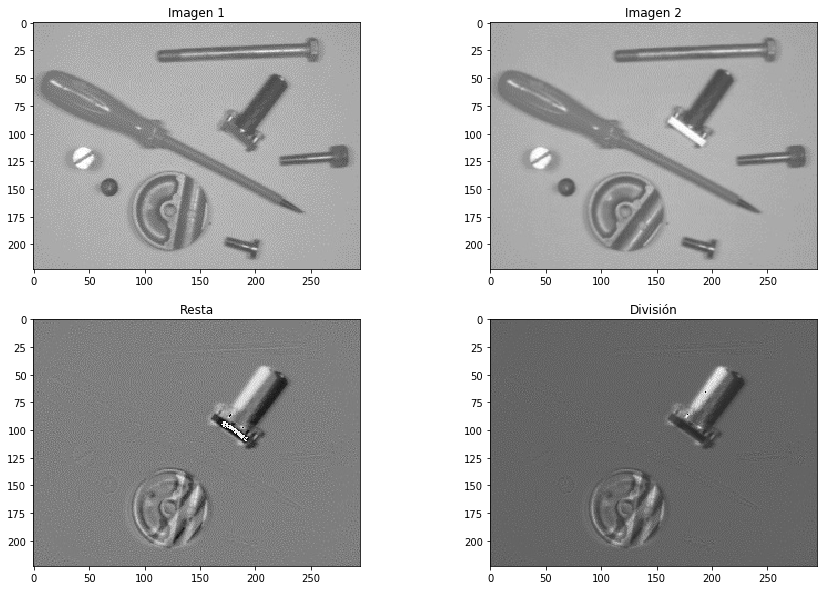

In [18]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de im√°genes de entrada, se ponen del mismo tama√±o para poder operarlas
img1 = cv2.cvtColor(cv2.imread('res/aritm/herr.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/aritm/herr2.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))


#RESTA
img1 = img1.astype(np.uint16)
img2 = img2.astype(np.uint16)
img1 += 125
res = img1 - img2
res = res.astype(np.uint8)
img1 -= 125
img1 = img1.astype(np.uint8)
img2 = img2.astype(np.uint8)

#DIVISION

#Es importante convertir los datos a flotante si se dispone a dividir
img1_div = img1.astype(np.float32)
img2_div = img2.astype(np.float32)
div = cv2.divide(img1_div,img2_div)
div = div * 100
div = div.astype(np.uint8)

#Crear figura 2x2 para mostrar las im√°genes de entrada con sus operaciones respectivas
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(2,2,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(2,2,3)
plt.imshow(res,cmap='gray')
plt.title("Resta")

plt.subplot(2,2,4)
plt.imshow(div,cmap='gray')
plt.title("Divisi√≥n")


## 5. Transformaciones Geom√©tricas
<ul>
<li>Las Transformaciones Geom√©tricas mantienen el valor de los p√≠xeles, sin embargo, modifican la relaci√≥n espacial entre ellos.</li>
<li>Para realizar una transformaci√≥n geom√©trica se deben realizar dos pasos:</li>
    <ul>
      <li>Definir el mapeo espacial de coordenadas entre la imagen de origen y la imagen de salida (rotaci√≥n, escala, traslaci√≥n, ...)</li>
  <li>Aplicar un algoritmo de interpolaci√≥n para definir el valor de los p√≠xeles que por la transformaci√≥n han quedado sin valor.</li>
  </ul>
</ul>
<br>
<center><i>Figura. Transformaciones geometricas.</i></center>
<img src="res/m3/transformacion_geometrica.png" alt="operaciones" style="height:500px"></img>
<br><br>
### Transformaci√≥n afin
<br>
Las transformaciones afines son un grupo de transformaciones geom√©tricas que preservan ciertas propiedades de las im√°genes. Un primer caso de este tipo de transformaci√≥n consiste en la familia de transformaciones geom√©tricas b√°sicas resultantes de rotaciones, escalamientos y traslaciones.
<br>
<center><i>Figura. Transformaci√≥n afin.</i></center>
<img src="res/m3/transformacion_afin.png" alt="operaciones" style="height:300px"></img>
<br>
### Traslaci√≥n
<br>
La Traslaci√≥n  es un mapeo en el que cada p√≠xel de la imagen de entrada es movido a una nueva posici√≥n en la imagen de salida:
<br>
<center><i>Figura. Traslacion.</i></center>
<img src="res/m3/traslacion.png" alt="operaciones" style="height:300px"></img>
<br>
Una aplicaci√≥n especial de la Traslaci√≥n es la reflexi√≥n de la imagen: 
<br>
<center><i>Figura. Traslacion - reflexion.</i></center>
<img src="res/m3/traslacion_2.png" alt="operaciones" style="height:300px"></img>
<br>

# Implementemos una traslaci√≥n rudimentaria.

[[  1   0 100]
 [  0   1 100]
 [  0   0   1]]


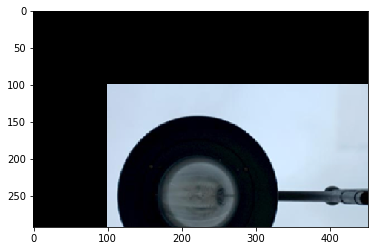

In [19]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Se dan valores para translaci√≥n en x e y
tx = 100
ty = 100

#Generar la matriz de traslaci√≥n
matriz_traslacion = np.array([[1,0,tx],[0,1,ty],[0,0,1]])
print(matriz_traslacion)

#Leer la imagen y obtener su tama√±o
I = cv2.cvtColor(cv2.imread("res/m3/example_3.png"),cv2.COLOR_BGR2RGB)
I_size = np.shape(I)
#Generar una matriz de ceros del mismo tama√±o y tipo de datos que I
G = np.zeros(I_size, np.uint8)

#Recorrer todas las componentes i,j de I
for i in range(I_size[0]):
    for j in range(I_size[1]):
        #Realiza la multiplicaci√≥n de matrices entre la matriz translaci√≥n y
        #una matriz generada por la iteraci√≥n
        w = np.matmul( matriz_traslacion, np.array([[i],[j],[1]]))
        #wx y wy son n√∫meros pertenecientes a la primera y segunda componente de w
        wx = w[0]
        wy = w[1]
        #Condicional doble para filtrar los valores de la translaci√≥n
        if(wx >= 0 and wx < I_size[0]):
            if(wy >= 0 and wy < I_size[1]):
                G[wx, wy] = I[i, j]
            
plt.imshow(G, cmap="gray")
            

<hr>

### Analicemos en clase

<ul>
<li>¬øPor que se pierde informaci√≥n en la traslaci√≥n? ¬øC√≥mo podemos solucionar esto?</li>

</ul>
<hr>

# Utilicemos OpenCv para realizar la traslaci√≥n

OpenCV recibe una matriz de transformaci√≥n afin con la siguiente forma (se omite la tercera fila):

<img src="res/afin.png">


Text(0.5, 1.0, 'Imagen Salida')

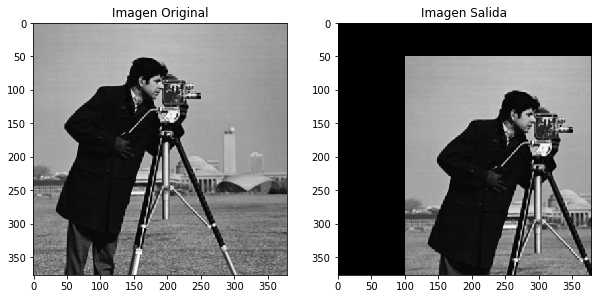

In [24]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de la imagen en escala de grises
img =cv2.imread('res/camara.png',cv2.IMREAD_GRAYSCALE)
#Se obtienen los vectores filas, columnas
filas,columnas = img.shape
#Se asignan valores a tx y ty, se construye la matriz M de translaci√≥n
tx = 100
ty = 50
matriz_afin = np.float32([[1,0,tx],
                          [0,1,ty]])

#Transformaci√≥n de la imagen con base en la matriz M, usando warpAffine
res = cv2.warpAffine(img,matriz_afin,(columnas,filas))# , flags=cv2.INTER_CUBIC)

#Figura 1x2 para mostrar la entrada y la salida
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.title("Imagen Salida")



# Reflexi√≥n

La reflexi√≥n es un caso especial de la traslaci√≥n, en la que se manipulan los √≠ndices correspondientes a la diagonal principal en la matriz afin.

Al reflejar una imagen, invertimos la posici√≥n de todos los elementos de la misma. Sin embargo, esto significa que los valores de intensidad quedan por fuera del espacio matricial original, por lo que se realiza una traslaci√≥n del n√∫mero de columnas o filas para devolver la imagen al recuadro.

In [21]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de la imagen en escala de grises
img = cv2.imread('res/camara.png',cv2.IMREAD_GRAYSCALE)
#Obtener los datos de filas y columnas de la imagen
filas,columnas = img.shape

#Generar la matriz de reflexi√≥n en X
matriz_afin_ref_x = np.float32([[-1,0,columnas]
                                ,[0,1,0]])
#Aplicar la matriz de transformaci√≥n de reflexi√≥n X a la imagen
ref_x = cv2.warpAffine(img,matriz_afin_ref_x,(columnas,filas))

#Generar la matriz de reflexi√≥n en Y
matriz_afin_ref_y = np.float32([[1,0,0]
                                ,[0,-1,filas]])
#Aplicar la matriz de transformaci√≥n de reflexi√≥n Y a la imagen
ref_y = cv2.warpAffine(img,matriz_afin_ref_y,(columnas,filas))

#Generar la matriz de reflexi√≥n simult√°nea en X & Y
matriz_afin_ref_xy = np.float32([[-1,0,columnas]
                                ,[0,-1,filas]])
#Aplicar la matriz de transformaci√≥n X & Y a la imagen
ref_xy = cv2.warpAffine(img,matriz_afin_ref_xy,(columnas,filas))

#Generar figura 2x2 que muestra la imagen original y las reflexiones
fig = plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(ref_x,cmap='gray')
plt.title("Reflexi√≥n horizontal")

plt.subplot(2,2,3)
plt.imshow(ref_y,cmap='gray')
plt.title("Reflexi√≥n vertical")

plt.subplot(2,2,4)
plt.imshow(ref_xy,cmap='gray')
plt.title("Reflexi√≥n en ambos sentidos");


<hr>
# Rotaci√≥n
<br>
La Rotaci√≥n es un mapeo en que se produce un cambio de orientaci√≥n de la imagen.
<br>
<center><i>Figura. Rotacion.</i></center>
<img src="res/m3/rotacion.png" alt="operaciones" style="height:300px"></img>
<br>
Donde El punto $(x_0, y_0)$ son las coordenadas del centro de rotaci√≥n y $\theta$ el √°ngulo de rotaci√≥n.
<br>

<center><i>Figura. Rotacion - Ejemplos.</i></center>
<img src="res/m3/rotacion_2.png" alt="operaciones" style="height:200px"></img>
<br>
Un caso especial que se debe considerar es si la imagen de salida debe cambiar para cubrir toda la imagen de entrada
<br>

<center><i>Figura. Rotaci√≥n - cambio de tama√±o de la imagen de salida.</i></center>
<img src="res/m3/rotacion_3.png" alt="operaciones" style="height:300px"></img>
<br>
La operacion de rotaci√≥n obligatoriamente implica realizar un proceso de interpolaci√≥n para corregir casos de coordenadas que no coinciden con posiciones exactas de pixeles en la imagen.
<hr>


OpenCV facilita la funci√≥n getRotationMatrix2D, la cual nos permite calcular la matriz de transformaci√≥n afin para cualquier rotaci√≥n dado un √°ngulo en grados y el centro de rotaci√≥n.


[[ 6.123234e-17  1.000000e+00  1.000000e+00]
 [-1.000000e+00  6.123234e-17  3.780000e+02]]


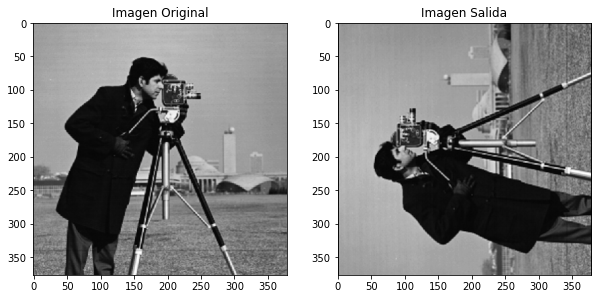

In [69]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de la imagen de entrada
img =cv2.imread('res/camara.png',cv2.IMREAD_GRAYSCALE)
#Obtener los datos de filas y columnas de la imagen
filas,columnas = img.shape

#Asignar un √°ngulo de rotaci√≥n
theta = 90

#Selecci√≥n del eje de rotaci√≥n
rotation_center = ((columnas/2,filas/2))
#rotation_center = ((0,0))

#Con base en el √°ngulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)
#Mostrar la matriz calculada
print(matriz_afin_rot)

#Aplicar la matriz obtenida sobre la imagen le√≠da
rot = cv2.warpAffine(img,matriz_afin_rot,(columnas,filas))

#Figura 1x2 para mostrar imagen original y resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(rot,cmap='gray')
plt.title("Imagen Salida");


### Inclinaci√≥n
<br>
La Inclinaci√≥n transforma una regi√≥n rectangular en un rombo. Sirve para ‚Äúsimular‚Äù una perspectiva. La inclinaci√≥n se puede dar en el eje X, en e Y o en ambos:
<br>
<center><i>Figura. Ejemplos de inclinacion. El valor de inclinaci√≥n es la tangente del √°ngulo.</i></center>
<img src="res/m3/inclinacion.png" alt="operaciones" style="height:300px"></img>
<br>
<ul>
    <li>La Inclinaci√≥n sobre X en una cantidad $I_x$: $R(x,y) = ùê¥(ùë•‚àíI_x‚àóy, y)$</li>
    <li>La Inclinaci√≥n sobre Y en una cantidad $I_y$: $R(x,y) = ùê¥(x, y - I_y*x)$</li>
    <li>La Inclinaci√≥n sobre X y Y en sus respectivas cantidades: $R(x,y) = A(‚àíI_x‚àóy, y - I_y*x)$</li>
</ul>
<br>
<center><i>Figura. Matriz afin para la inclinacion.</i></center>
<img src="res/m3/inclinacion_2.png" alt="operaciones" style="height:300px"></img>
<br>
<center><i>Figura. Ejemplos de valores de inclinacion.</i></center>
<img src="res/m3/inclinacion_3.png" alt="operaciones" style="height:200px"></img>
<hr>

Text(0.5, 1.0, 'Imagen Salida')

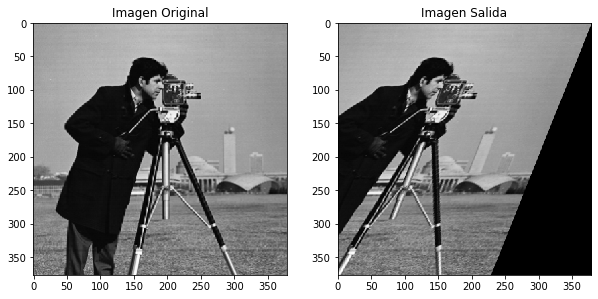

In [26]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np
 
#Lectura de imagen de entrada y obtenci√≥n de filas y columnas
img =cv2.imread('res/camara.png',cv2.IMREAD_GRAYSCALE)
filas,columnas = img.shape

#Con base en la teor√≠a, crear la matriz M de inclinaci√≥n
#reemplazando los valores b y d
inc_x = -0.4
inc_y = 0.0
matriz_afin = np.float32([[1,inc_x,0],
                          [inc_y,1,0]])

#Aplicar la matriz generada a la imagen le√≠da
res = cv2.warpAffine(img,matriz_afin,(columnas,filas))

#Generar la figura 1x2 y mostrar entrada vs resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.title("Imagen Salida")

<hr>

### Escala
<br>
La Escala permite cambiar el tama√±o de las im√°genes:
<br>
<center><i>Figura. Escala.</i></center>
<img src="res/m3/escala.png" alt="operaciones" style="height:300px"></img>
<br>
El grado de calidad de una transformacion de escala, radica en completar la informacion faltante de forma tal que se mantenga la apariencia visual de la imagen original.
<br>
<center><i>Figura. Escala - Interpolacion.</i></center>
<img src="res/m3/escala_2.png" alt="operaciones" style="height:400px"></img>
<hr>

La Interpolaci√≥n puede considerarse como el c√°lculo del valor de intensidad de un p√≠xel, en una posici√≥n cualquiera, como una funci√≥n de los p√≠xeles que la rodean.
<br><br>
Existen diferentes tipos de interpolaci√≥n:
<ul>
    <li>Vecino m√°s cercano</li>
    <li>Lineal</li>
    <li>Bilineal</li>
    <li>Bic√∫bica</li>
    <li>Supermuestreo</li>
</ul>
<br>
La <b>Interpolaci√≥n del vecino m√°s cercano</b>: $B(x,y) = A(\left \lfloor \frac{x}{10}  \right \rfloor , \left \lfloor \frac{y}{10}  \right \rfloor)$, donde 10 es el factor de escala.
<br>
<b>Ventajas</b>:
<ul>
    <li>Es muy sencilla y r√°pida de calcular.</li>
</ul>
<br>
<b>Inconvenientes</b>:
<ul>
    <li>El efecto de cuadriculado es evidente, y da lugar im√°genes de poca calidad</li>
    <li>A medida que el factor de escala aumenta, la imagen se hace m√°s y m√°s borrosa</li>
</ul>
<br>
<hr>
La <b>Interpolaci√≥n Lineal</b> promedia los dos vecinos m√°s cercanos para encontrar el valor del p√≠xel.
<br><br>
<b>Ventajas</b>:
<ul>
    <li>Es muy r√°pida de calcular y mejora un poco los resultados con respecto a la interpolaci√≥n por vecino m√°s cercano.</li>
</ul>
<br>
<b>Inconvenientes</b>:
<ul>
    <li>Da lugar im√°genes de poca calidad</li>
</ul>
<br>
<hr>
La Interpolaci√≥n Bilineal es una mejora de la anterior, promediando en este caso 4 pixeles adyacentes. Sin embargo, los factores de ponderaci√≥n vienen dados por la distancia de los 4 p√≠xeles se que usaran para la interpolaci√≥n
<br>
<b>Ventajas</b>:
<ul>
    <li>Mejora los resultados de la interpolaci√≥n haciendo los cambios m√°s suaves.</li>
</ul>
<br>
<b>Inconvenientes</b>:
<ul>
    <li>Es m√°s costosa computacionalmente.</li>
</ul>
<br>
<center><i>Figura. Interpolacion bilineal.</i></center>
<img src="res/m3/interpolacion_2.png" alt="interpolacion bilineal" style="height:200px"></img>
<br>
<center><i>Figura. Interpolacion bilineal.</i></center>
<img src="res/m3/interpolacion_3.png" alt="interpolacion bilineal" style="height:120px"></img>
<br>
<center><i>Figura. Interpolacion bilineal.</i></center>
<img src="res/m3/interpolacion_4.png" alt="interpolacion bilineal" style="height:90px"></img>
<br>
<center><i>Figura. Interpolacion bilineal.</i></center>
<img src="res/m3/interpolacion_5.png" alt="interpolacion bilineal" style="height:90px"></img>
<br>
<center><i>Figura. Interpolacion bilineal.</i></center>
<img src="res/m3/interpolacion_6.png" alt="interpolacion bilineal" style="height:70px"></img>
<hr>

In [73]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Leer la imagen de entrada a color y convertirla RGB
img=cv2.imread('res/m3/doge.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Acercar la imagen de entrada con base en una aproximaci√≥n de vecinos cercanos
#o interpolaci√≥n bilinear/bic√∫bica
nearest = cv2.resize(img,(img.shape[1]*4, img.shape[0]*4), interpolation = cv2.INTER_NEAREST)
bilinear = cv2.resize(img,None,fx=4, fy=4, interpolation = cv2.INTER_LINEAR)
bicubic = cv2.resize(img,None,fx=4, fy=4, interpolation = cv2.INTER_CUBIC)

#Generar figura 2x2 para mostrar y contrastar las aproximaciones con la imagen original
fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(nearest,cmap='gray')
plt.title("Interpolaci√≥n vecinos m√°s cercanos")

plt.subplot(2,2,3)
plt.imshow(bilinear,cmap='gray')
plt.title("Interpolaci√≥n bilineal")

plt.subplot(2,2,4)
plt.imshow(bilinear,cmap='gray')
plt.title("Interpolaci√≥n bic√∫bica")

#Guardar las im√°genes en la carpeta del notebook
nearest = cv2.cvtColor(nearest, cv2.COLOR_BGR2RGB)
bilinear = cv2.cvtColor(bilinear, cv2.COLOR_BGR2RGB)
bicubic = cv2.cvtColor(bicubic, cv2.COLOR_BGR2RGB)


cv2.imwrite("nearest.jpg", nearest);
cv2.imwrite("bilinear.jpg", bilinear);
cv2.imwrite("bicubic.jpg", bicubic);
